In [3]:
import numpy as np
import pandas as pd



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

np.random.seed(21)

## Loading Train, Validate and Test Data

In [4]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

## Detailed EDA

In [5]:
#Test and Train Dataset Shape
data_train.shape
data_test.shape

(800, 22)

(200, 21)

There are 800 datapoints with 21 features and 1 target variable in the train dataset.
There are 200 datapoints with 21 features in the test dataset

In [6]:
data_train.head()
data_test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,...,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,...,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,...,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,...,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,...,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


In [7]:
data_train.dtypes.value_counts()
data_train.isnull().sum()

int64      12
object      8
float64     2
dtype: int64

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

From above we can see that, there are -
- 12 int type features
- 8 object type features
- 2 float type features

**Class/ASD** is the Target Variable.
And no NaN Values in the dataset.

<Axes: >

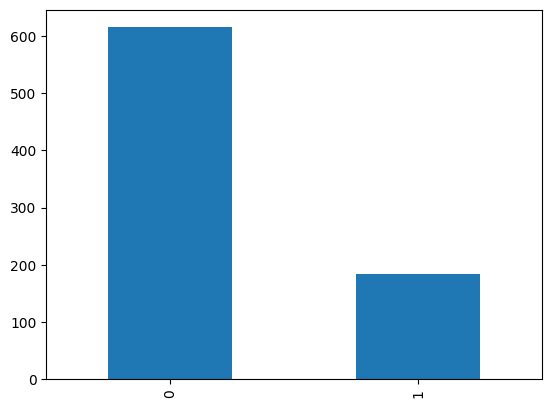

In [8]:

data_train['Class/ASD'].value_counts().plot.bar()

From above output, we can say that the data is biased.

As we have 615 datapoints for Class '0' (No) and only 185 datapoints for Class '1' (Yes), we can say that the data is Imbalanced.

And before building the model we will have to oversample the minority Class or apply SMOTE techniques. (I will cover this in my next notebook along with Model Building)


Lets look at the top and bottom 5 rows of the train data, to understand the features
and there possible impact on the model.

In [9]:

data_train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [10]:

data_train.select_dtypes(include='int64').head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,0
1,2,0,0,0,0,0,0,0,0,0,1,0
2,3,1,1,1,1,1,1,0,0,1,1,1
3,4,0,0,0,1,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,1,1,0


From above we can see that, all the 'int64' type features have binary values (0 or 1), except for ID, which is unique identification for patient.
Since it is not required for model building. Let us drop it from both train and test datasets.


In [11]:
data_train.drop(columns='ID', axis=1,inplace=True)
test_df = data_test.drop(columns='ID')

Let's look at the A1 to A10 Scores and there possible relation with target column 'Class/ASD'.

<Axes: xlabel='A1_Score'>

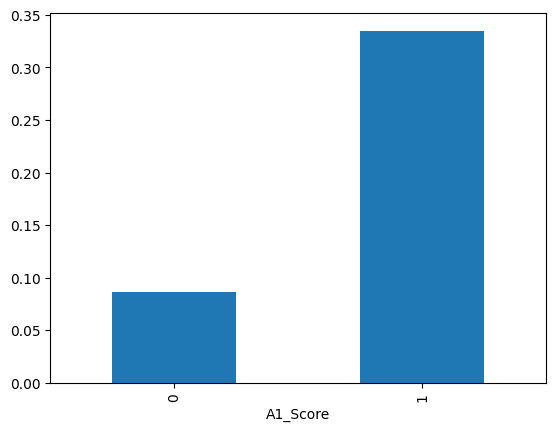

In [12]:
data_train.groupby('A1_Score')['Class/ASD'].mean().plot.bar()

Patients with higer score are more likely to have Autism.

In [13]:

data_train.select_dtypes(include='object').head()

,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,age_desc,relation
0,f,White-European,no,no,United States,no,18 and more,Self
1,f,South Asian,no,no,Australia,no,18 and more,?
2,f,White-European,no,no,United Kingdom,no,18 and more,Self
3,f,South Asian,no,no,New Zealand,no,18 and more,?
4,m,Black,no,yes,Italy,no,18 and more,Self


From above output we can see that-

**gender,used_app_before** doesn't seem to be features with any importance, lets drop these columns.

**jaundice, autism** are the binary variables - We will have to encode these before bulding the model.

**ethnicity,contry_of_res,age_desc,relation** are nominal variables



In [14]:
data_train.drop(columns=['gender','used_app_before'], axis=1,inplace=True)
test_df = test_df.drop(columns=['gender','used_app_before'], axis=1)

Let us analyze the distribution of **ethnicity, contry_of_res and age_desc**

<Axes: >

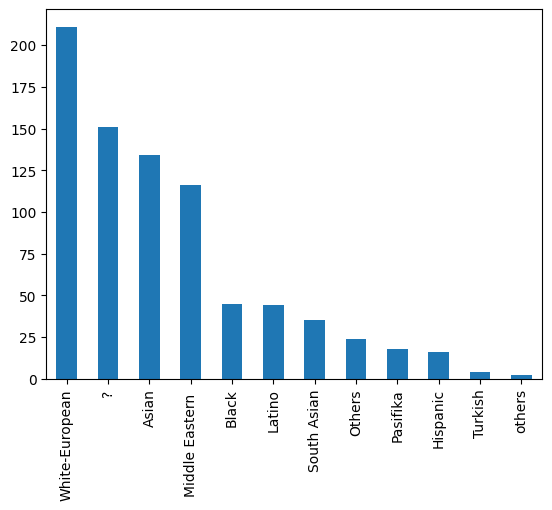

In [15]:
data_train['ethnicity'].value_counts().plot.bar()

<Axes: xlabel='ethnicity'>

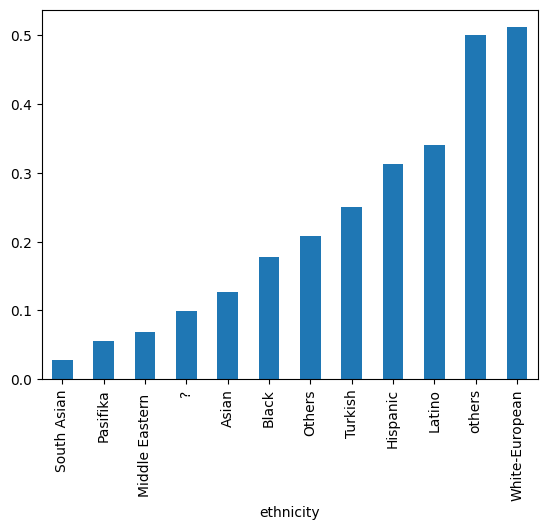

In [16]:
data_train.groupby('ethnicity')['Class/ASD'].mean().sort_values().plot.bar()

There are 151 rows with '?' as the value. We will have to impute this before building the model.
Also, Majority of the 'White-European' are diagnosed with Autism.

In [17]:
data_train['contry_of_res'].value_counts()
data_train[data_train['contry_of_res']== '?'].value_counts()

United States           148
United Arab Emirates     94
New Zealand              93
India                    74
United Kingdom           58
                       ... 
Indonesia                 1
Tonga                     1
Iraq                      1
Finland                   1
Niger                     1
Name: contry_of_res, Length: 61, dtype: int64

Series([], dtype: int64)

<Axes: >

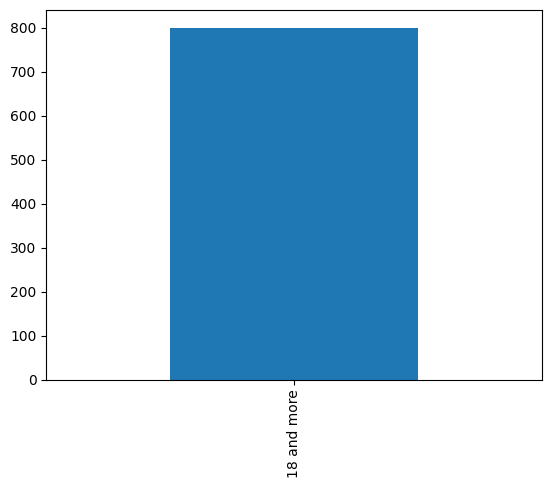

In [18]:
data_train['age_desc'].value_counts().plot.bar()

**age_desc** column has 0 variance. Hence, this doesn't add any value to model building and can be dropped before building the model.

In [19]:
data_train.drop(columns='age_desc', axis=1,inplace=True)
test_df = test_df.drop(columns='age_desc')

<Axes: >

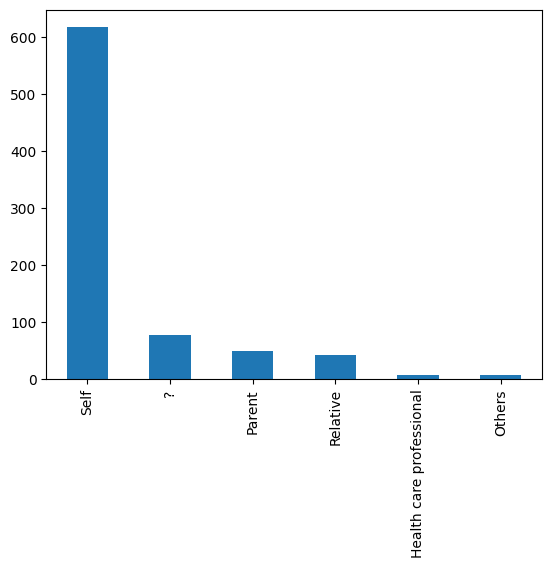

In [20]:
data_train['relation'].value_counts().plot.bar()

<Axes: xlabel='relation'>

Text(0.5, 1.0, 'Relation of patient who completed the test')

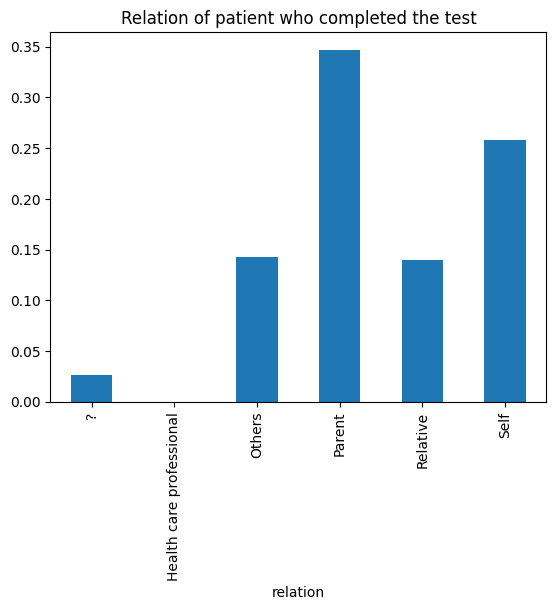

In [21]:
data_train.groupby('relation')['Class/ASD'].mean().plot.bar()
plt.title('Relation of patient who completed the test')

There are 77 rows with '?' as the value. We will have to impute this (with mode) before building the model. Let us impute '?' with Others.
Note - I think this feature is not important for model building, as we already have 'austim' column to checkl for immediate family member. There fore, once I will build the model including this feature and then will check my model performance without this feature.

<Axes: xlabel='austim'>

Text(0.5, 1.0, 'Imediate family member diagnosed')

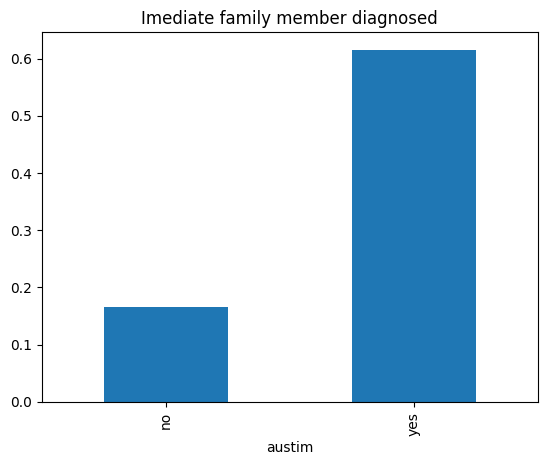

In [22]:
data_train.groupby('austim')['Class/ASD'].mean().plot.bar()
plt.title('Imediate family member diagnosed')

<Axes: xlabel='jaundice'>

Text(0.5, 1.0, 'Whether the patient had jaundice at the time of birth')

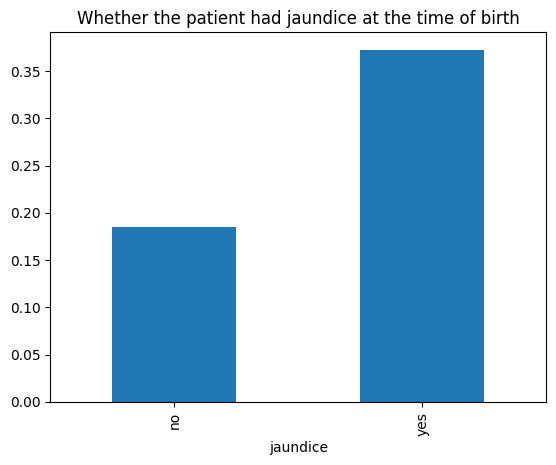

In [23]:
data_train.groupby('jaundice')['Class/ASD'].mean().plot.bar()
plt.title('Whether the patient had jaundice at the time of birth')

In [24]:
data_train.drop(columns=['ethnicity','contry_of_res', 'relation'], axis=1,inplace=True)
test_df = test_df.drop(columns=['ethnicity','contry_of_res', 'relation'], axis=1)

From the above EDA it is clear that -
- Person with higher scores are likely to have autism.
- Person who had jaundice at the time of brith are more likely to have autism.
- Person whoes immediate family member has autism is more likely to have autism.

## Modelling


#### First we will create a model with the imbalanced data

In [25]:

mapping = { 'yes' : 1 , 'no' : 0}

for data in [data_train, test_df]:
    data['jaundice']=data['jaundice'].replace(mapping).astype(float)
    data['austim']=data['austim'].replace(mapping).astype(float)

In [26]:
#Defining feature and Target variables for training model
X = data_train.drop('Class/ASD', axis=1)
y = data_train['Class/ASD']

In [27]:

print("Shape of X is {}, and shape of y is {}".format(X.shape, y.shape))

Shape of X is (800, 14), and shape of y is (800,)


In [28]:

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [29]:

rfc_model = RandomForestClassifier(n_estimators=150)

In [30]:

rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [31]:

y_pred_test = rfc_model.predict(X_test)

In [32]:
#Checking accuracy score, confusion matrix and classification report on test data
print("Accuracy score of RFC model on test dataset is : ")
print(accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Accuracy score of RFC model on test dataset is : 
0.8416666666666667
[[166  18]
 [ 20  36]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       184
           1       0.67      0.64      0.65        56

    accuracy                           0.84       240
   macro avg       0.78      0.77      0.78       240
weighted avg       0.84      0.84      0.84       240



In [33]:
from sklearn.metrics import roc_auc_score

y_probs = rfc_model.predict_proba(X_test)[:, 1]

# Calculating AUC score
auc_score = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc_score)


AUC Score: 0.8701960403726707


In [34]:

y_pred_test = rfc_model.predict(test_df)


pred_df = pd.DataFrame()
pred_df['ID'] = data_test['ID']
pred_df['Class/ASD'] = y_pred_test

#Exporting the values to a csv file
pred_df.to_csv('final_result.csv', index = False )

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, random_state=42)


xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)

y_pred_original = label_encoder.inverse_transform(y_pred)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Accuracy: 0.85


In [36]:
from sklearn.metrics import roc_auc_score

y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Calculating AUC score
auc_score = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc_score)


AUC Score: 0.8847270343665137


In [37]:
pip install lightgbm

In [38]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parameters for LightGBM model
params = {
    'objective': 'binary',  # For binary classification
    'metric': 'binary_error',  # Evaluation metric
    'early_stopping_rounds': 10  # Early stopping rounds
    # Other parameters can be added (e.g., boosting type, learning rate, max_depth, etc.)
}


num_round = 1000  # Maximum number of boosting rounds (iterations)
model = lgb.train(
    params,
    train_data,
    num_boost_round=num_round,
    valid_sets=[train_data, test_data],
)


y_pred = model.predict(X_test)

y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]


accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

auc = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc}")


[LightGBM] [Info] Number of positive: 126, number of negative: 434
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225000 -> initscore=-1.236763
[LightGBM] [Info] Start training from score -1.236763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [39]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [40]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = cb.CatBoostClassifier(iterations=1000,
                               learning_rate=0.1,  # Learning rate
                               depth=6,  # Depth of trees
                               loss_function='Logloss',
                               eval_metric='Accuracy',
                               random_seed=42)


model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=100)


y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
auc = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc}")



0:	learn: 0.8803571	test: 0.8375000	best: 0.8375000 (0)	total: 49ms	remaining: 49s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.875
bestIteration = 3

Shrink model to first 4 iterations.


Accuracy: 0.875
AUC Score: 0.7971720198520461


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


gbm = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3  # Maximum depth of individual trees

)


gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate AUC score
y_pred_proba = gbm.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc}")


GradientBoostingClassifier()

Accuracy: 0.8333333333333334
AUC Score: 0.8994287854668039
